## load library

In [2]:
import librosa
from librosa import display
import numpy as np
import matplotlib.pyplot as plt

## loading sample data

In [3]:
sample_rate=16000

# npy파일로 저장된 데이터를 불러옵니다.
sample_data = np.load("./npy_data/africa_npy.npy", allow_pickle = True)
# australia_train_data = np.load("./npy_data/australia_npy.npy", allow_pickle = True)
# canada_train_data = np.load("./npy_data/australia_npy.npy", allow_pickle = True)
# england_train_data = np.load("./npy_data/england_npy.npy", allow_pickle = True)
# hongkong_train_data = np.load("./npy_data/hongkong_npy.npy", allow_pickle = True)
# us_train_data = np.load("./npy_data/us_npy.npy", allow_pickle = True)

# test_data = np.load("./npy_data/test_npy.npy", allow_pickle = True)

# train_data_list = [africa_train_data, australia_train_data, canada_train_data, england_train_data, hongkong_train_data, us_train_data]

## Mel-Spectrogram

- n_mels : 칼라맵의 주파수 해상도

n_mels :  128


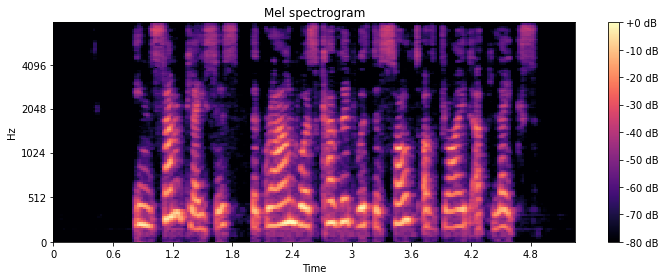

In [19]:
# calculate mel spectrogram 
S = librosa.feature.melspectrogram(y=sample_data[0], sr=sample_rate, n_mels=128)
print('n_mels : ', S.shape[0])

# show mel spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel spectrogram")
plt.tight_layout()

## MFCC ((Mel Frequency Cepstral Coefficient)

- mel spectrogram을 DCT(Discrete Cosine Transform) 처리하면 얻게되는 coefficient를 말합니다. 쉽게 얘기하면, mel scale로 변환한 스펙트로그램을 더 적은 값들로 압축하는 과정이라고 볼 수 있습니다. 이미지를 압축하는 과정에서도 DCT를 사용하기도 합니다

In [23]:
# Convert a dB-scale spectrogram to a power spectrogram.
# db_to_power(S_db) ~= ref * 10.0**(S_db / 10)
log_S = librosa.power_to_db(S, ref=np.max)

mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=20)

delta1_mfcc = librosa.feature.delta(mfcc, order=1)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

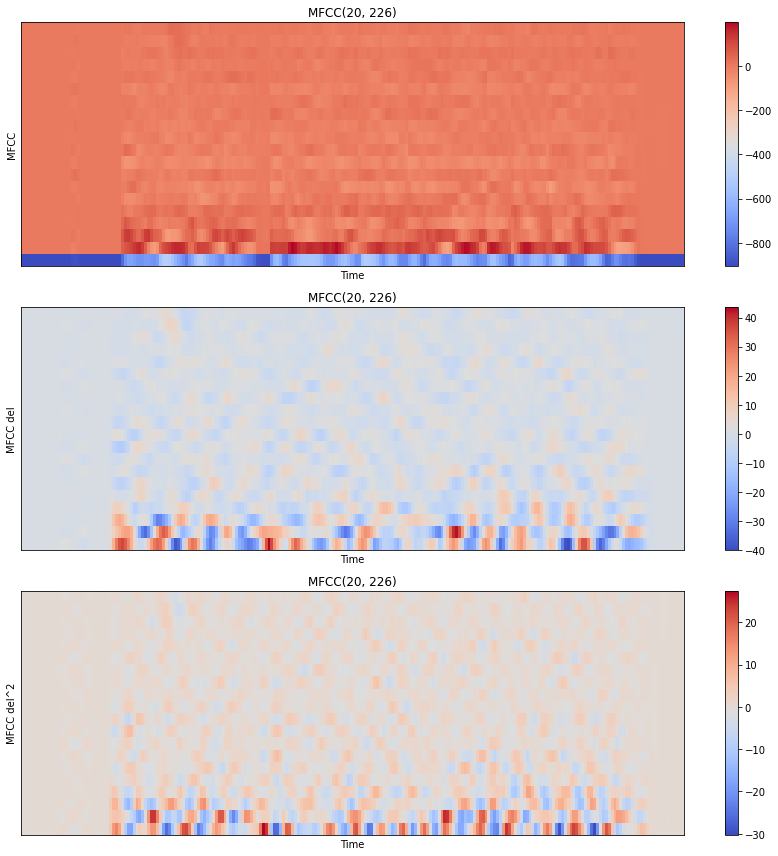

In [52]:
fig = plt.figure(figsize=(12, 12))

ax1 = fig.add_subplot(3, 1, 1)
librosa.display.specshow(mfcc)
plt.ylabel('MFCC')
plt.xlabel('Time')
plt.title('MFCC' + str(mfcc.shape))
plt.colorbar()
plt.tight_layout()

ax2 = fig.add_subplot(3, 1, 2)
librosa.display.specshow(delta1_mfcc)
plt.ylabel('MFCC del')
plt.xlabel('Time')
plt.title('MFCC' + str(delta1_mfcc.shape))
plt.colorbar()
plt.tight_layout()

ax3 = fig.add_subplot(3, 1, 3)
librosa.display.specshow(delta2_mfcc)
plt.ylabel('MFCC del^2')
plt.xlabel('Time')
plt.title('MFCC' + str(delta2_mfcc.shape))
plt.colorbar()
plt.tight_layout()

plt.show()